In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snd

In [3]:
zomato=pd.read_csv('zomato.csv')
zomato.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
zomato.drop(['Restaurant ID','Longitude','Latitude','Locality Verbose','Switch to order menu','Rating color'],axis=1,inplace=True)

In [6]:
zomato.shape

(9551, 15)

In [7]:
### Duplicate Sum
zomato.duplicated().sum()

0

In [8]:
### check for null value
zomato.isnull().sum()

Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating text             0
Votes                   0
dtype: int64

In [9]:
### remove null value 
zomato.dropna(how='any',inplace=True)
zomato.shape

(9542, 15)

In [10]:
zomato.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Address', 'Locality',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating text', 'Votes'],
      dtype='object')

In [11]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9542 non-null   object 
 1   Country Code          9542 non-null   int64  
 2   City                  9542 non-null   object 
 3   Address               9542 non-null   object 
 4   Locality              9542 non-null   object 
 5   Cuisines              9542 non-null   object 
 6   Average Cost for two  9542 non-null   int64  
 7   Currency              9542 non-null   object 
 8   Has Table booking     9542 non-null   object 
 9   Has Online delivery   9542 non-null   object 
 10  Is delivering now     9542 non-null   object 
 11  Price range           9542 non-null   int64  
 12  Aggregate rating      9542 non-null   float64
 13  Rating text           9542 non-null   object 
 14  Votes                 9542 non-null   int64  
dtypes: float64(1), int64(

In [12]:
zomato['Country Code'].value_counts()
## maximum resturant located in india 

1      8652
216     425
215      80
189      60
30       60
214      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64

##### FInding City with Cheap  Restaurant
> First step will be to find the restaurants with average cost 25th percentile . We only pick the restaurants that are less than  1/4th of average Cost and find the most common city .


In [32]:
## City with cheap restaurants
th25 = np.percentile(zomato['Average Cost for two'], q=[ 25])
city_with_cheap = zomato[['Average Cost for two','City','Restaurant Name']][zomato['Country Code']==1]
city_with_cheap=city_with_cheap[city_with_cheap['Average Cost for two']!=0]
city_with_cheap=city_with_cheap[city_with_cheap['Average Cost for two']<=th25[0]]
city_with_cheap.sort_values(by='Average Cost for two',ascending=True,inplace=True)

city_with_cheap['City'].value_counts()

# city_with_cheap=city_with_cheap[city_with_cheap['Average Cost for two']<=th25[0]]
#print(city_with_cheap)

New Delhi     1367
Noida          198
Gurgaon        177
Faridabad       60
Amritsar         5
Ghaziabad        4
Puducherry       3
Nagpur           3
Bhopal           2
Nashik           2
Surat            2
Allahabad        1
Indore           1
Lucknow          1
Mangalore        1
Varanasi         1
Ranchi           1
Name: City, dtype: int64

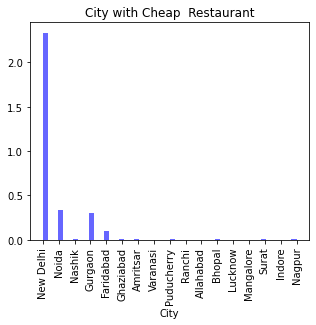

In [29]:
plt.figure(figsize =(5,4))
plt.hist(city_with_cheap['City'], bins=50, density=True, alpha=0.6, color='b')
plt.title('City with Cheap  Restaurant')
plt.xticks(rotation=90)
plt.xlabel('City')
plt.show()


### After explore the data, we can make a conclusion that the city with cheap restaurant is New Dehli. Beacuae dehli accur most of time in  data that is less than 25%. 

#### Restaurant with largest number of votes
>To find the restaurant with lagest number of votes .We only pick top 10 by votes.  

Text(0, 0.5, 'Vote')

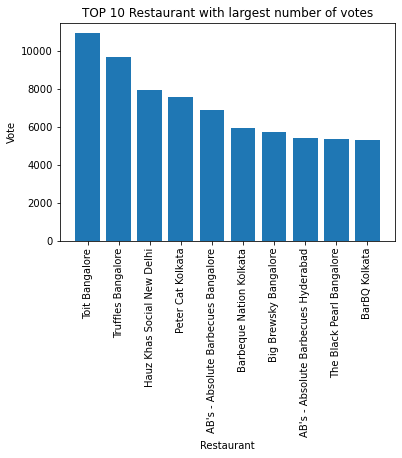

In [34]:
###Restaurant with largest number of votes
votes=zomato[['Restaurant Name','Votes','City']][zomato['Country Code']==1]
votes.sort_values(by='Votes',ascending=False,inplace=True)
plt.bar(height=votes['Votes'][0:10],x=votes['Restaurant Name'][0:10] + ' ' + votes['City'][0:10])
plt.title('TOP 10 Restaurant with largest number of votes')
plt.xticks(rotation=90)
plt.xlabel('Restaurant')
plt.ylabel('Vote')


> After explore data .We found that Tiot in Bangalore has largest vote .

#### City with  Most expensive restaurant 
>First step will be to find the restaurants with average cost 75th percentile . We only pick the restaurants that are less than 1/4th of average Cost and find the most common city .


In [37]:
th75 = np.percentile(zomato['Average Cost for two'], q=[75])
city_with_expensive = zomato[['Average Cost for two','City','Restaurant Name']][zomato['Country Code']==1]
city_with_expensive.sort_values(by='Average Cost for two',ascending=False,inplace=True)
city_with_expensive=city_with_expensive[city_with_expensive['Average Cost for two']!=0]
city_with_expensive=city_with_expensive[city_with_expensive['Average Cost for two']>th75[0]]
city_with_expensive



,Average Cost for two,City,Restaurant Name
7543,8000,New Delhi,Orient Express - Taj Palace Hotel
4088,7000,New Delhi,Tian - Asian Cuisine Studio - ITC Maurya
4087,6500,New Delhi,Bukhara - ITC Maurya
7499,6000,New Delhi,The Spice Route - The Imperial
7492,6000,New Delhi,Nostalgia at 1911 Brasserie - The Imperial
...,...,...,...
5504,750,New Delhi,Ingredients
6945,750,New Delhi,Facebook Fast Food
7614,750,New Delhi,Ahad Sons Restaurant
8729,750,Noida,Khidmat


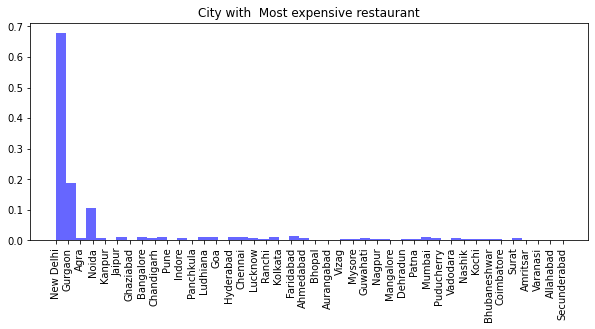

In [38]:
plt.figure(figsize =(10,4))
plt.hist(city_with_expensive['City'], bins=50, density=True, alpha=0.6, color='b')
plt.xticks(rotation=90)
plt.title('City with  Most expensive restaurant')
plt.show()


#### Msot expensive Restaurant also in dehli 



#### City with excellent rating
>To find the city with excellent rating . we only pick resturant has rating more than 4.5 .


In [40]:
city_rating =zomato[['City','Aggregate rating']][zomato['Country Code']==1]
city_rating=city_rating[city_rating['Aggregate rating']>4.5]
city_rating
# plt.figure(figsize =(10,4))
# plt.hist(city_rating_top_20['City'][-10:], bins=50, density=True, alpha=0.6, color='b')
# plt.xticks(rotation=90)
# plt.title('City with excellent rating')
# plt.show()


,City,Aggregate rating
637,Agra,4.9
653,Ahmedabad,4.6
727,Bangalore,4.7
728,Bangalore,4.8
733,Bangalore,4.6
...,...,...
9157,Pune,4.8
9195,Secunderabad,4.6
9228,Vadodara,4.6
9256,Vizag,4.6


##  City with largest number of votes


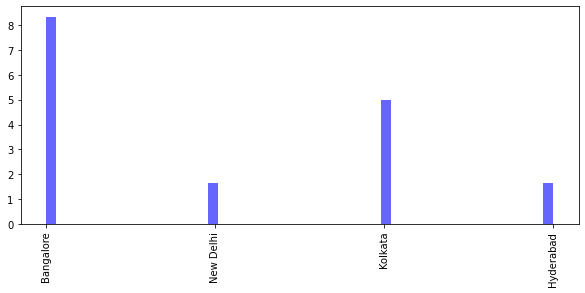

In [84]:
city_votes =zomato[['City','Votes']][zomato['Country Code']==1]
city_votes.sort_values(by='Votes',ascending=False,inplace=True)
top_20_city_with_vote  = city_votes[:10]
top_20_city_with_vote
plt.figure(figsize =(10,4))
plt.hist(top_20_city_with_vote['City'], bins=50, density=True, alpha=0.6, color='b')
plt.xticks(rotation=90)
plt.xlabel="City"
plt.ylabel="Frequency in top 20 vpotes "
plt.show()
